# Проект по моделям машинного обучения с учителем (supervised learning) - Классификация на основе деревьев

## Описание проекта

Этот проект посвящён созданию и анализу моделей машинного обучения для предсказания оттока (churn) клиентов. Мы исследуем различия моделей на основе деревьев, таких как Decision Tree, Random Forest, AdaBoost, и Gradient Boosting, и анализируем данные для подогрева гипотез и улучшения моделей.

## Цель проекта

Цель проекта — разработать и применить модели на основе деревьев для предсказания вероятности того, что клиент уйдёт в отток. Также мы изучаем влияние различных признаков на данное событие.

## Содержание

### Часть 1: Анализ данных

На первом этапе происходит проверка типов данных и наличия отсутствующих значений с использованием метода .info(). Это помогает нам оценить состояние исходного набора данных и подготовить его для дальнейшего анализа.

### Часть 2: Исследование и сегментация данных

Здесь проводится исследование признаков, включая анализ различных характеристик абонентов, которые могут помочь в моделировании оттока.

### Часть 3: Анализ оттока

-   Мы создаём когорты на основе времени (tenure), которое клиент провёл с компанией, и вычисляем процент оттока для каждой когорты. Это помогает идентифицировать, как длительность пребывания клиента влияет на вероятность его оттока.

-   На основе tenure мы создаём более крупные категории для более детализированного анализа:

    -   '0-12 месяцев'
    -   '12-24 месяцев'
    -   '24-48 месяцев'
    -   'Более 48 месяцев'

### Часть 4: Моделирование

-   Одно дерево решений (Decision Tree) - Создаём и оцениваем модель Decision Tree, включая:

-   Случайный лес (Random Forest) - Построение модели случайного леса и составление отчётов на основе предсказаний на тестовом наборе данных.

-   Расширяемые деревья (Boosted Trees) - Использование модели Gradient Boosting с анализом качества предсказаний через отчёты и матрицы путаницы.

## Заключение

В рамках проекта были получены лучшие результаты с моделью GradientBoostingClassifier, несмотря на отсутствие глубокой оптимизации гиперпараметров. Большая часть моделей показывала схожие результаты при текущей настройке данных.

---

In [2]:
# Запустите эти ячейки для начала выполнения проекта!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Часть 1: Общие характеристики данных

**Задание: С помощью метода .info() проверьте типы данных для колонок, а также есть ли отсутствующие значения в Вашем датафрейме.**

In [5]:
# Напишите Ваш код в этой ячейке
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Задание: Выведите статистические метрики для числовых колонок с помощью .describe(). Вы увидите, что большинство колонок являются категориальными, поэтому Вам позднее нужно будет создать для них дамми-переменные.**

In [6]:
# Напишите Ваш код в этой ячейке
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Часть 2:  Исследование данных (Exploratory Data Analysis)

## Исследование признаков

**Задание: Проверьте, что в этих данных нет отсутствующих значений - для этого выведите количество значений NaN отдельно для каждой колонки.**

In [7]:
# Напишите Ваш код в этой ячейке
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Задание: Постройте график CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

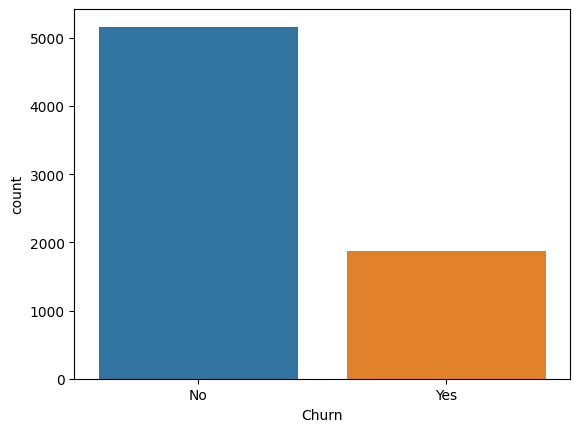

In [8]:
# Напишите Ваш код в этой ячейке
sns.countplot(data=df, x='Churn', hue='Churn')

**Задание: Исследуйте распределение колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

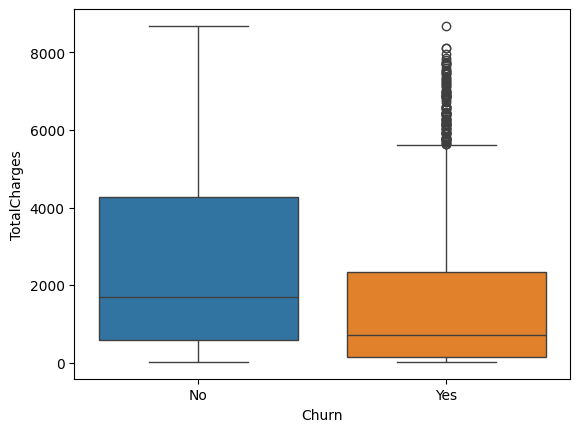

In [9]:
# Напишите Ваш код в этой ячейке
sns.boxplot(data=df, x='Churn', y='TotalCharges', hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

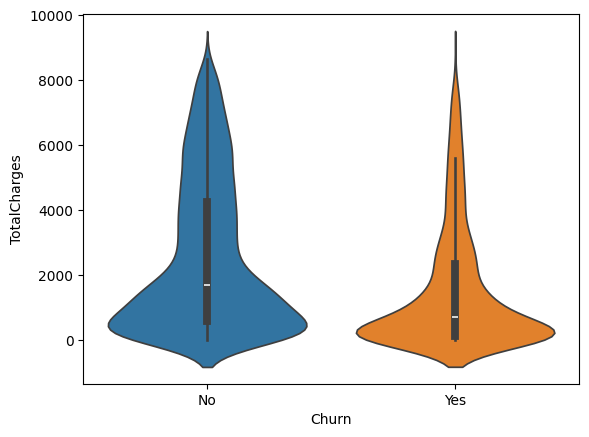

In [10]:
sns.violinplot(data=df, x='Churn', y='TotalCharges', hue='Churn')

**Задание: Постройте график boxplot с распределением колонки TotalCharges для различных типов контрактов, а также добавьте раскраску цветами по колонке Churn.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

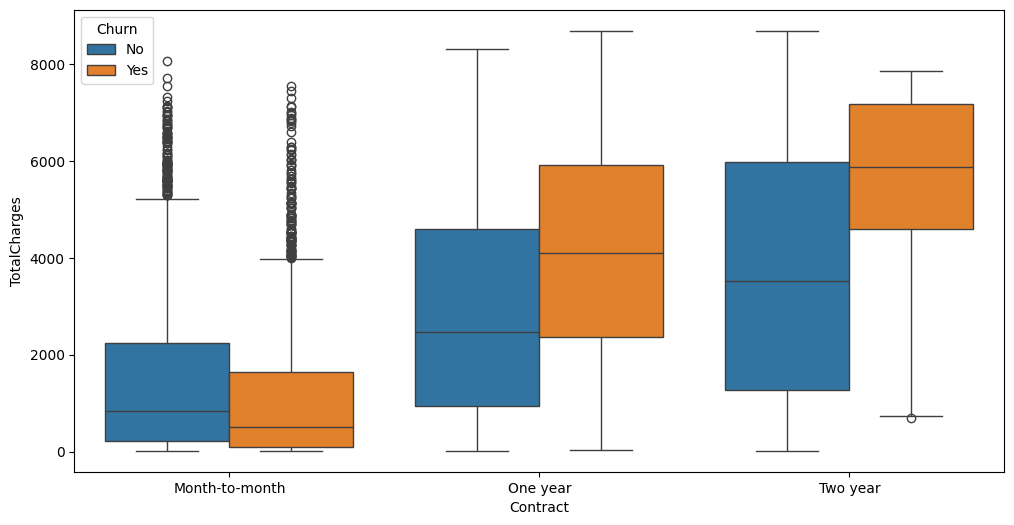

In [11]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

**Задание: Постройте график barplot с корреляции указанных ниже признаков с целевой переменной. Обратите внимание, что для категориальных признаков сначала нужно сконвертировать их в дамми-переменные, потому что корреляция вычисляется только для числовых колонок.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Мы специально привели список признаков, чтобы не проверять все признаки. Дело в том, что некоторые признаки имеют слишком много уникальных значений для такого анализа, например колонка customerID.***

In [12]:
# Напишите Ваш код в этой ячейке
df_dummies = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]
df_dummies = pd.get_dummies(df_dummies, drop_first=True, dtype=int)

In [13]:
df_dummies.corr(numeric_only=True)['Churn_Yes']

SeniorCitizen                            0.150541
gender_Male                             -0.008545
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
PhoneService_Yes                         0.011691
MultipleLines_No phone service          -0.011691
MultipleLines_Yes                        0.040033
OnlineSecurity_No internet service      -0.227578
OnlineSecurity_Yes                      -0.171270
OnlineBackup_No internet service        -0.227578
OnlineBackup_Yes                        -0.082307
DeviceProtection_No internet service    -0.227578
DeviceProtection_Yes                    -0.066193
TechSupport_No internet service         -0.227578
TechSupport_Yes                         -0.164716
InternetService_Fiber optic              0.307463
InternetService_No                      -0.227578
StreamingTV_No internet service         -0.227578
StreamingTV_Yes                          0.063254
StreamingMovies_No internet service     -0.227578


<Axes: >

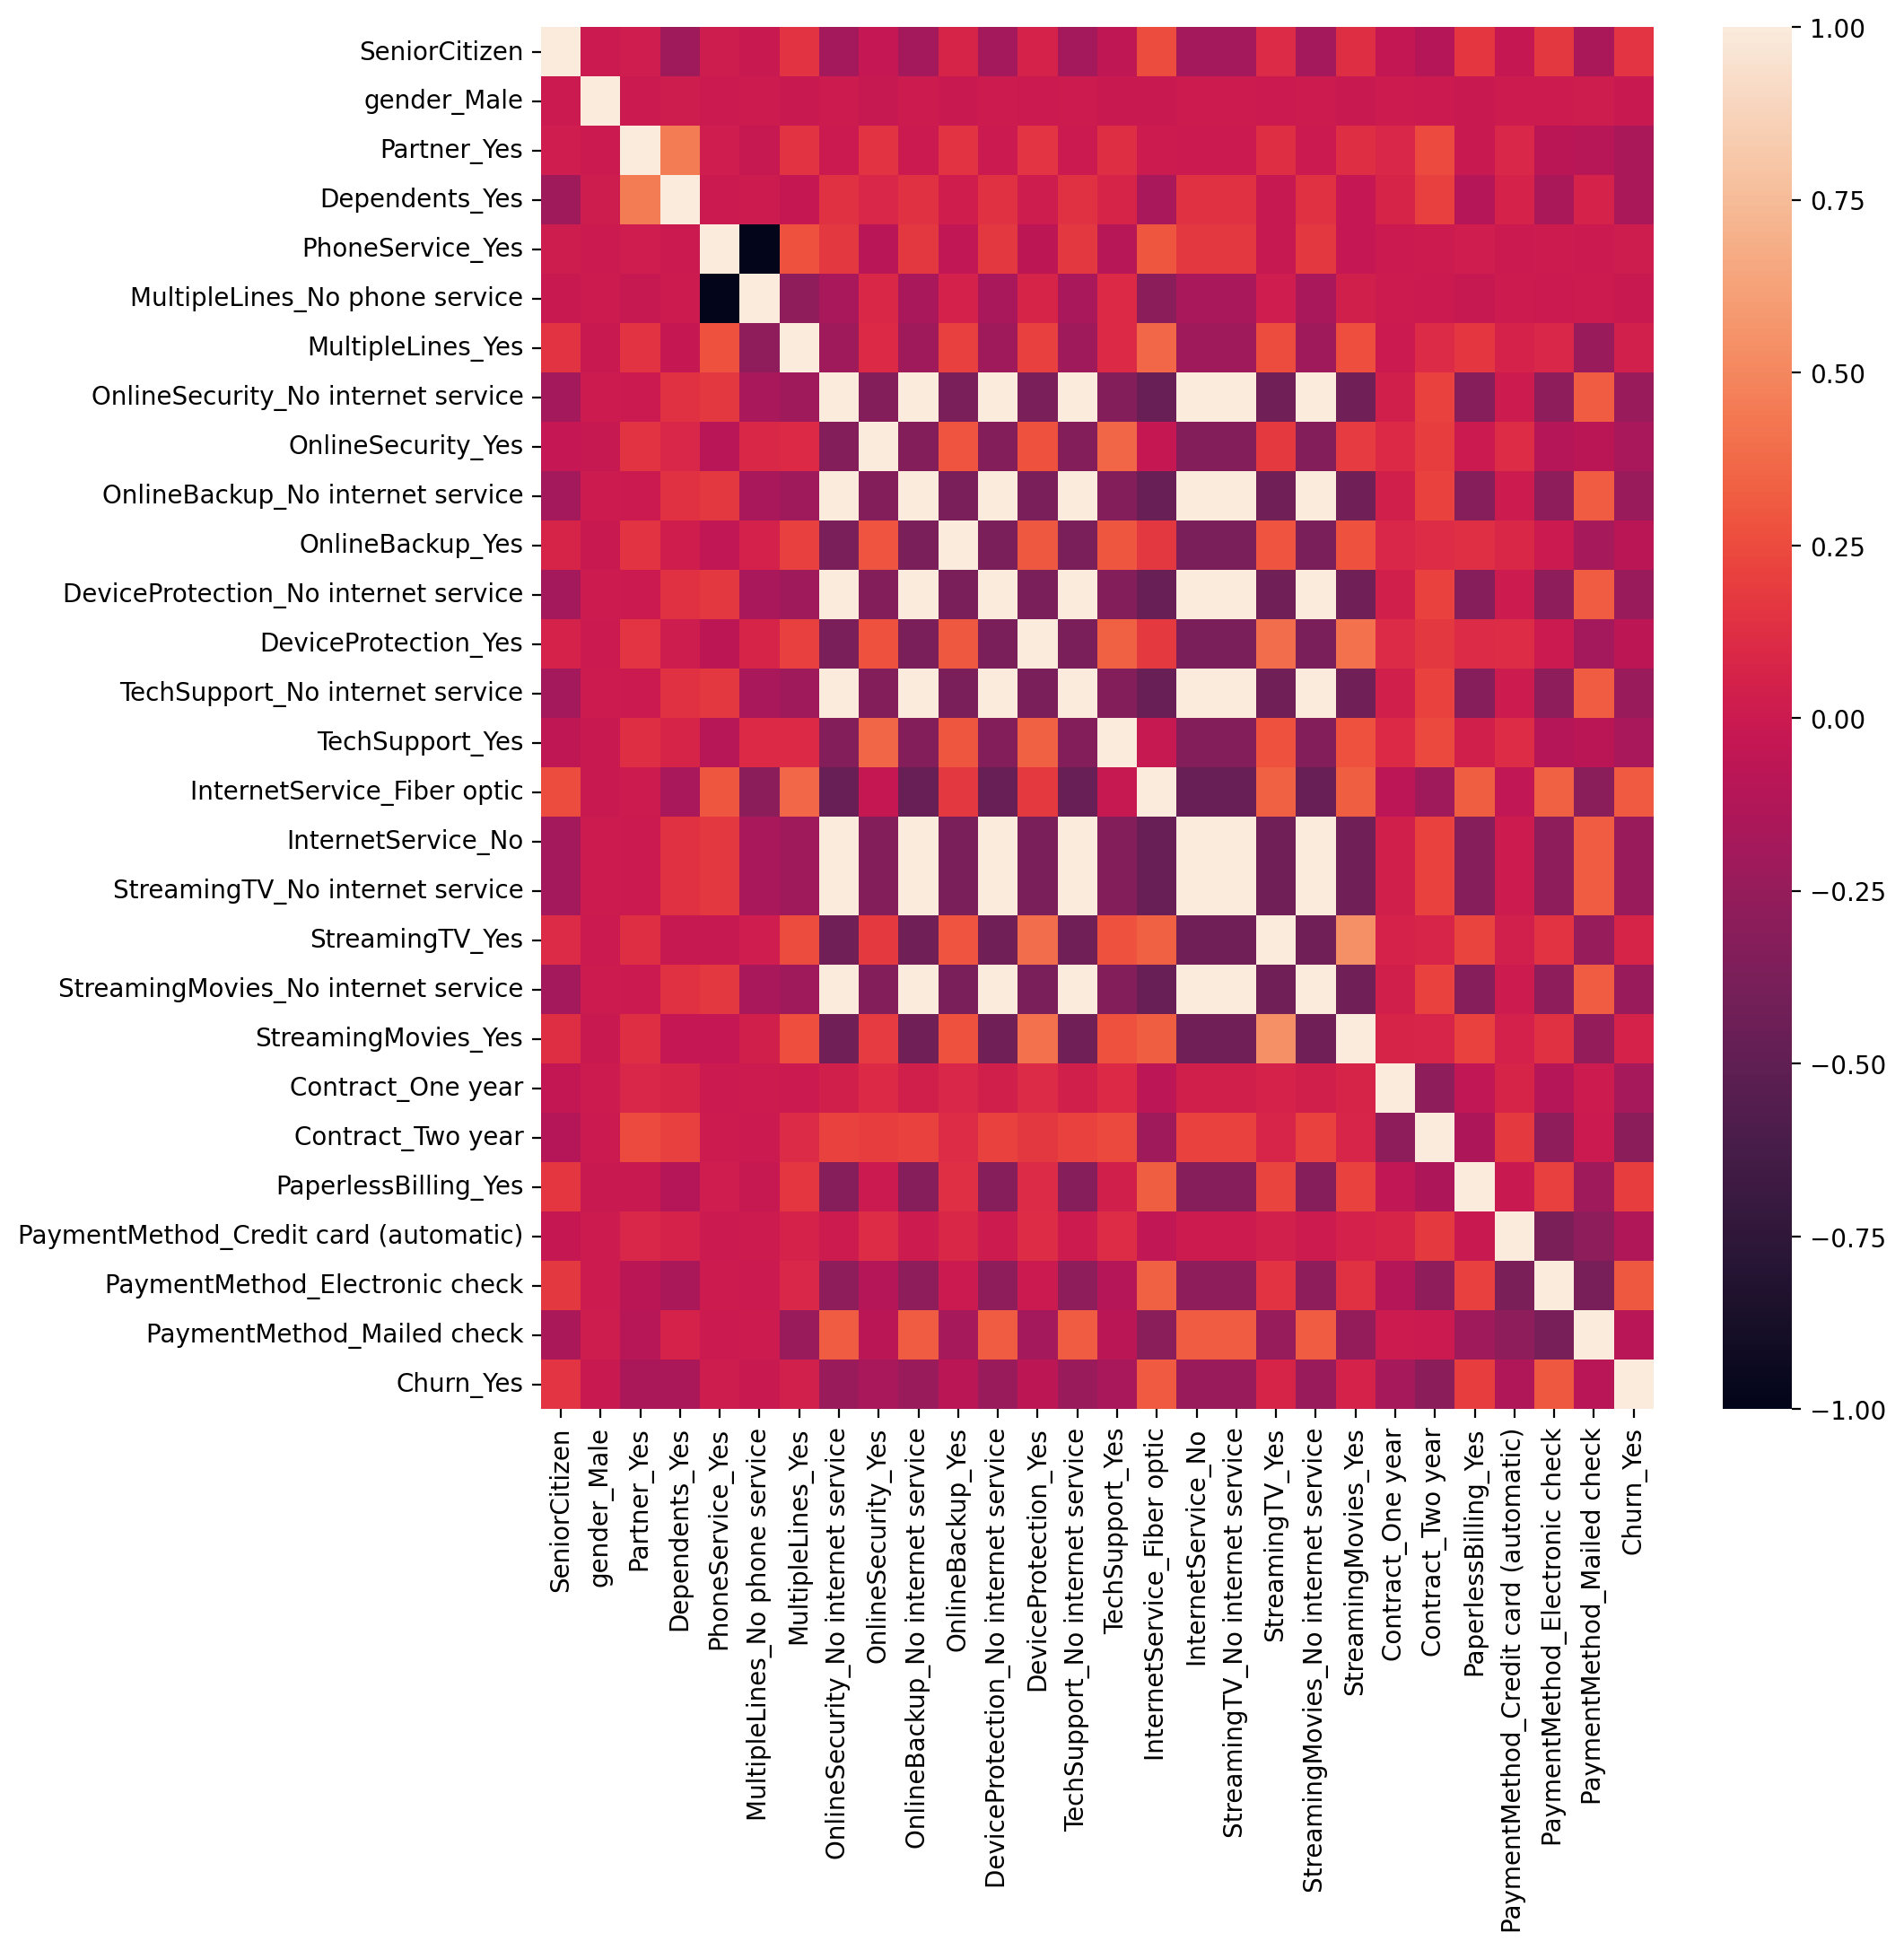

In [14]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(df_dummies.corr(numeric_only=True))

---
---

# Часть 3: Анализ оттока

**В этих заданиях мы выполним сегментацию абонентов на основе колонки tenure, создавая "когорты" и выполняя сравнение данных между различными когортами.**

**Задание: Перечислите 3 типа контракта (колонка Contract).**

In [15]:
# Напишите Ваш код в этой ячейке
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Задание: Создайте гистограмму с распределением значений колонки tenure - это количество месяцев, сколько времени человек является (или являлся) абонентом компании.**

<Axes: xlabel='tenure', ylabel='Count'>

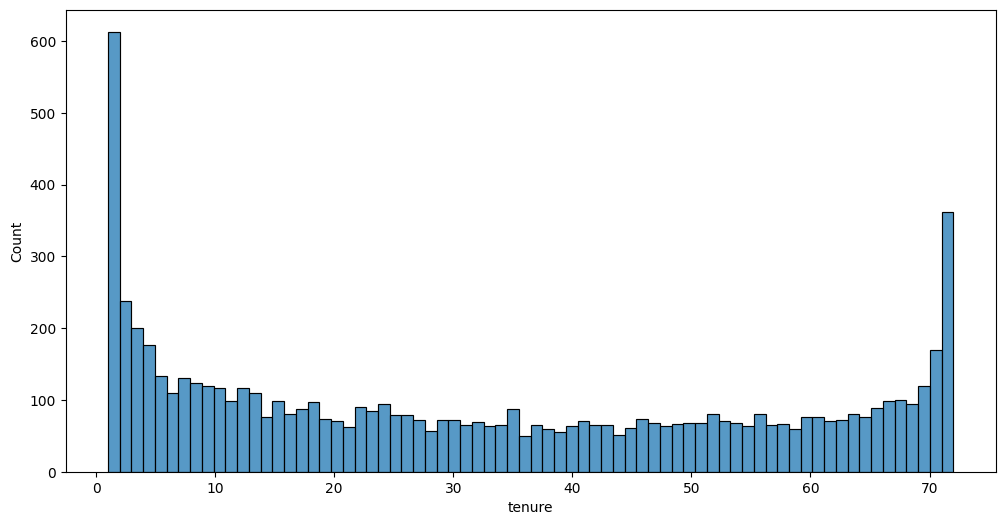

In [16]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', bins=72)

**Задание: Постройте гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract. Посмотрите документацию по seaborn или блокноты для раздела про seaborn, чтобы вспомнить, как это делается.**

<Figure size 1200x600 with 0 Axes>

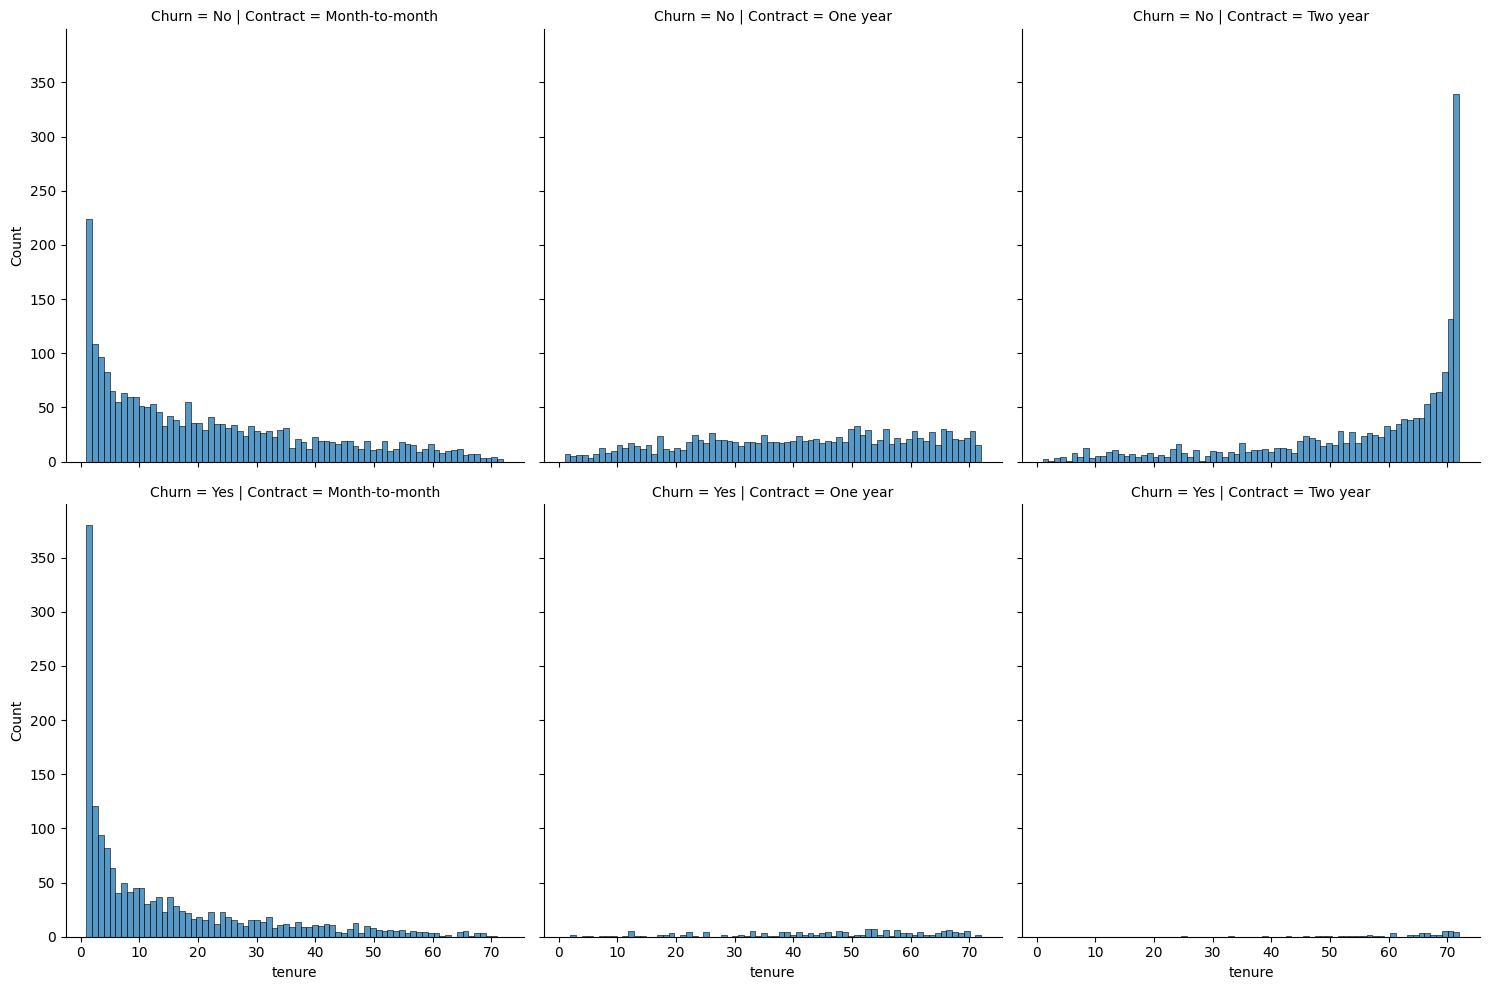

In [17]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.displot(data=df, x='tenure', bins=72, col='Contract', row='Churn')

**Задание: Постройте график scatterplot для колонок Total Charges и Monthly Charges, раскрашивая график цветами по колонке Churn.**

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

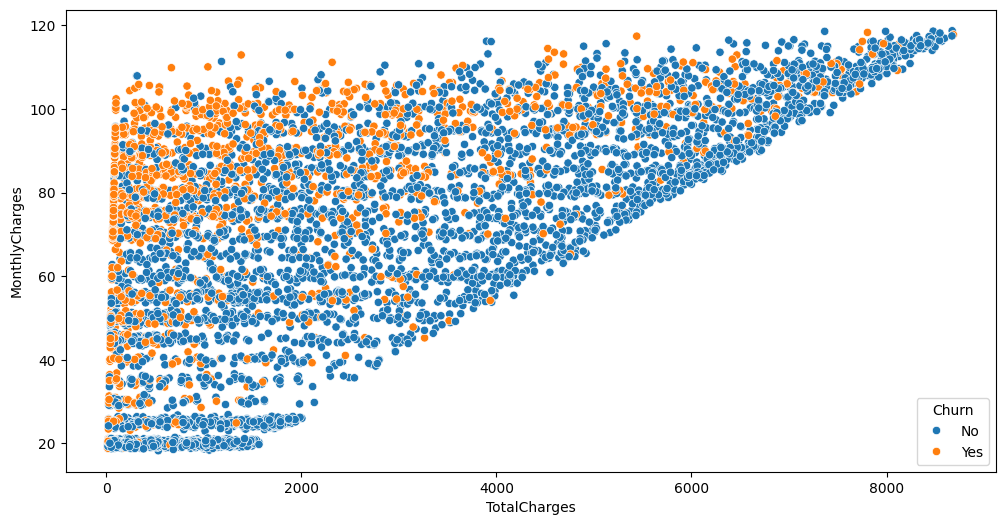

In [18]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')

### Создание когорт (сегментов) по колонке Tenure

**Для начала поместим различные значения tenure (1 месяц, 2 месяца, 3 месяца и так далее) в отдельные когорты (сегменты).**

**Задание: Для каждого уникального значения колонки tenure в качестве когорты, вычислите процент оттока (churn rate) - это количество тех людей, кто ушёл в отток в когорте, как процент от общего количества людей в данной когорте. Вычислите такой процент отдельно для каждой когорты. Например, для когорты с tenure = "1 месяц" должен получиться процент оттока 61.99%. В итоге у Вас должны получиться когорты от 1 до 72 месяцев, и с увеличением количества месяцев уровень оттока должен снижаться. Это разумно, потому что чем дольше человек пользуется услугами компании, тем вероятнее то, что его/её всё устраивает, и он/она продолжит пользоваться этими услугами.**

In [19]:
# Напишите Ваш код в этой ячейке
yes_churn = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [20]:
no_churn = df.groupby(['Churn', 'tenure']).count().transpose()['No']

In [21]:
churn_rate = yes_churn / (yes_churn + no_churn) * 100
churn_rate

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [22]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Задание: Используя результаты предыдущего задания, постройте график процента оттока для различных значений tenure.**

<Axes: xlabel='tenure'>

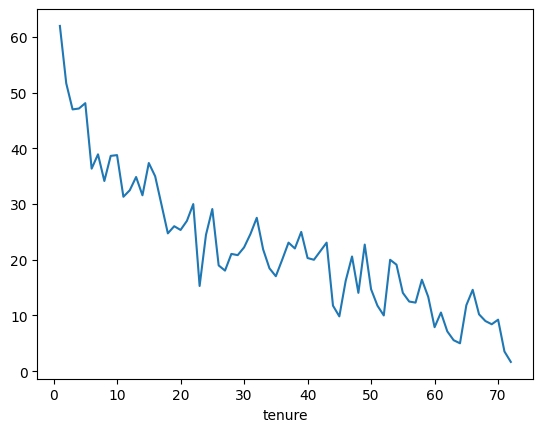

In [23]:
# Напишите Ваш код в этой ячейке
churn_rate.transpose()['customerID'].plot()

### Более крупные когорты (сегменты)
**Задание: На основе колонки tenure создайте новую колонку с названием "Tenure Cohort", в которой будут следующие 4 категории:**
   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [24]:
# Напишите Ваш код в этой ячейке
def cohort(tenure):
    if 0 <= tenure <= 12:
        return '0-12 месяцев'
    elif 13 <= tenure <= 24:
        return '12-24 месяцев'
    elif 25 <= tenure <= 48:
        return '24-48 месяцев'
    elif tenure > 48:
        return 'Более 48 месяцев'

In [25]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [26]:
df[['Tenure Cohort', 'tenure']]

,Tenure Cohort,tenure
0,0-12 месяцев,1
1,24-48 месяцев,34
2,0-12 месяцев,2
3,24-48 месяцев,45
4,0-12 месяцев,2
...,...,...
7027,12-24 месяцев,24
7028,Более 48 месяцев,72
7029,0-12 месяцев,11
7030,0-12 месяцев,4


**Задание: Постройте график scatterplot для Total Charges и Monthly Charges, раскрашивая график разными цветами по колонке "Tenure Cohort", которую Вы создали в предыдущем задании.**

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

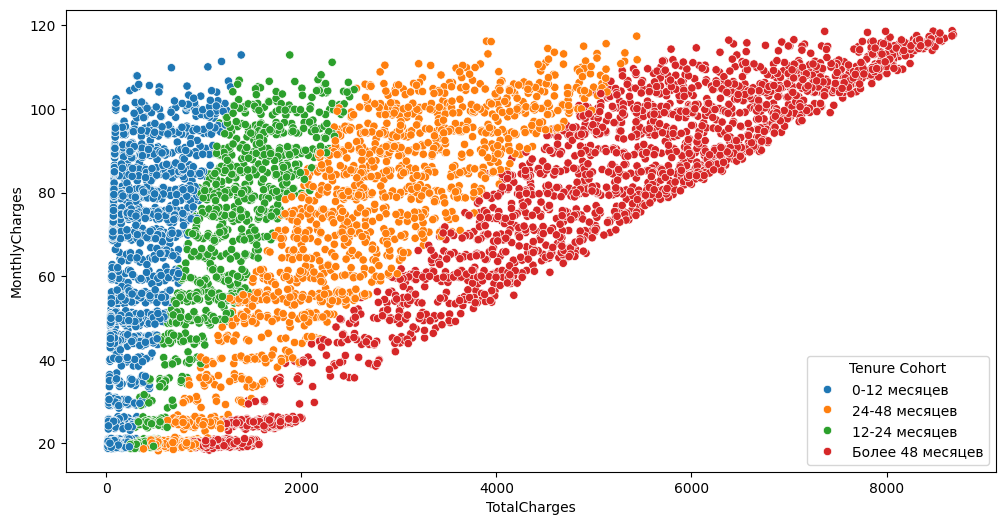

In [27]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Tenure Cohort')

**Задание: Постройте график countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

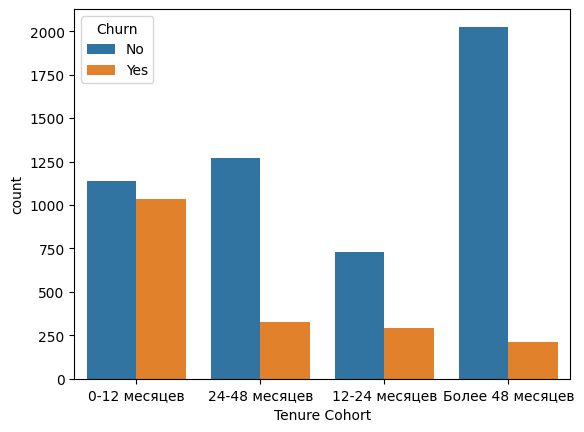

In [28]:
# Напишите Ваш код в этой ячейке
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

**Задание: Создайте набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта создайте отдельный график, и раскрасьте эти графики разными цветами по колонке Churn.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

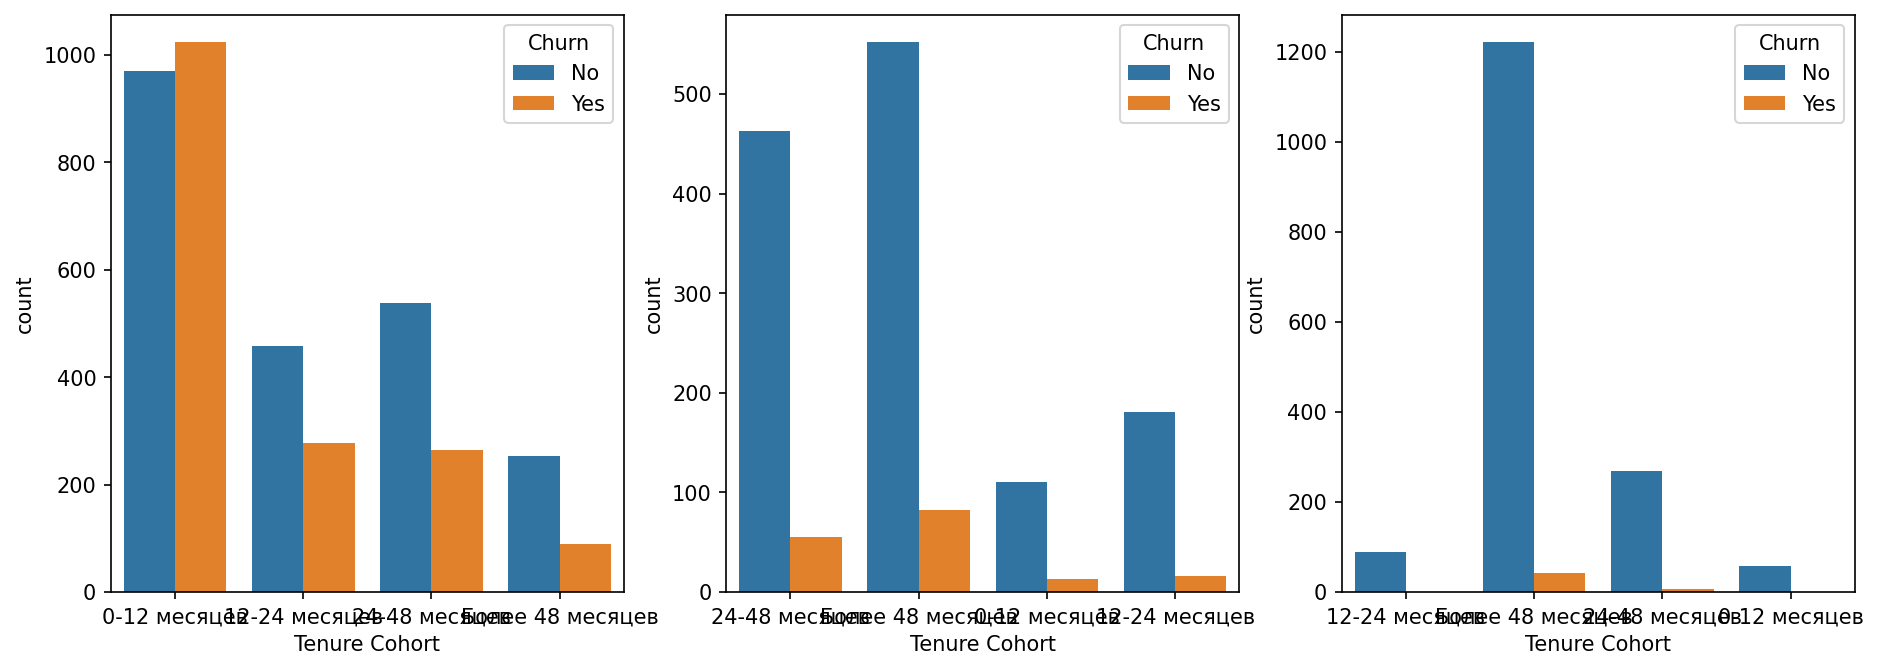

In [29]:
# Напишите Ваш код в этой ячейке
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(1, 3, 1)
sns.countplot(data=df[df['Contract'] == 'Month-to-month'], x='Tenure Cohort', hue='Churn')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Contract'] == 'One year'], x='Tenure Cohort', hue='Churn')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Contract'] == 'Two year'], x='Tenure Cohort', hue='Churn')

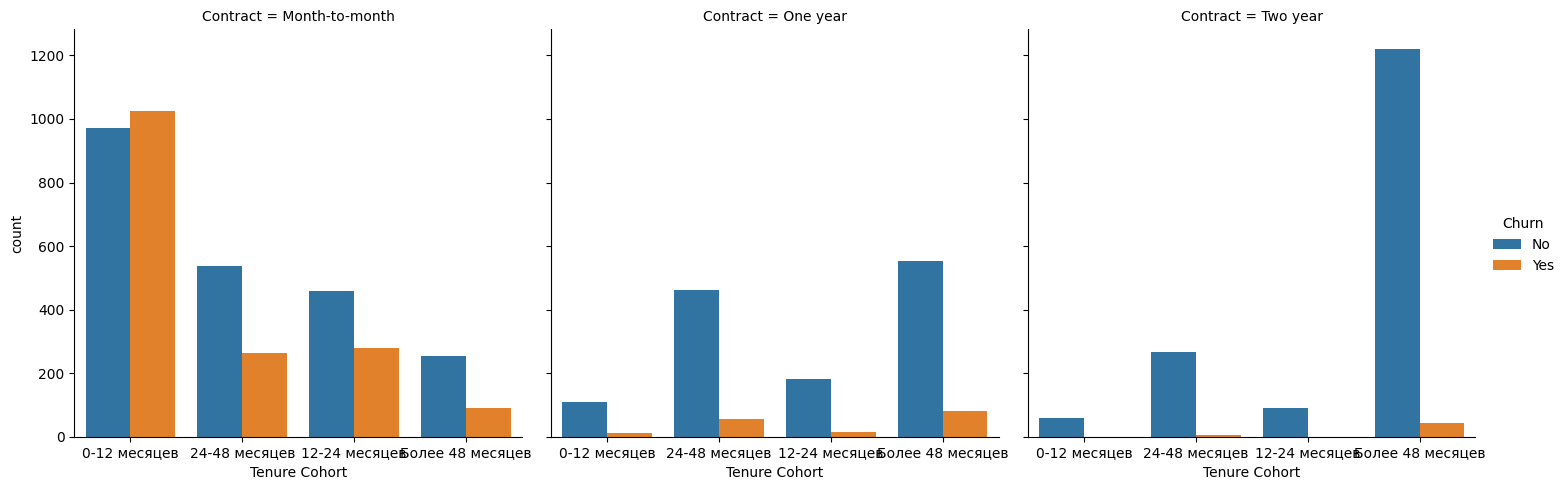

In [30]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', kind='count', col='Contract')

-----

# Часть 4: Предиктивная модель

**Давайте исследуем 4 модели на основе деревьев: одно дерево решений, случайный лес, адаптивный бустинг и градиентный бустинг. При желании Вы можете дополнительно попробовать любые другие модели машинного обучения с учителем (supervised learning models) и сравнить результаты!**


## Одно дерево решений (Decision Tree)

**Задание: Разделите все данные на признаки X и целевую переменную Y. Создайте дамми-переменные, где это необходимо, а также посмотрите, есть ли какие-то признаки, которые можно было бы удалить.**

In [31]:
# Напишите Ваш код в этой ячейке
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7032,7032,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
X = pd.get_dummies(data=df.drop(['customerID', 'Churn', 'Tenure Cohort'], axis=1), drop_first=True, dtype=int)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [33]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

**Задание: Выполните разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования. В решениях мы используем random_state=101.**

In [34]:
# Напишите Ваш код в этой ячейке
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Задание: Постройте модель Decision Tree и оцените её работу. Для этого выполните следующие шаги:**
   1. Обучите модель дерева решений (при желании можете выполнить поиск по сетке для поиска оптимальных значений гиперпараметров).
   2. Оцените метрики работы модели дерева решений - для этого выведите отчёт "classification report" и нарисуйте график с матрицей ошибок (confusion matrix).
   2. Посмотрите на важности признаков для получившегося дерева решений.
   4. Опционально: Нарисуйте график получившегося дерева. Обратите внимание, что если дерево получилось очень большим и Вы не выполняли усечение дерева с помощью параметров, то вызов метода plot_tree может привести к ошибке.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model = DecisionTreeClassifier()

In [41]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [47]:
dt_grid = GridSearchCV(estimator=dt_model, param_grid=param_grid)

In [48]:
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [49]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [50]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [51]:
y_pred = dt_grid.predict(X_test)

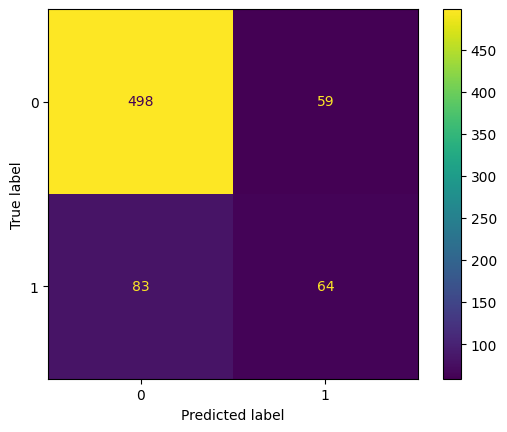

In [54]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.52      0.44      0.47       147

    accuracy                           0.80       704
   macro avg       0.69      0.66      0.67       704
weighted avg       0.79      0.80      0.79       704



In [56]:
from sklearn.tree import plot_tree

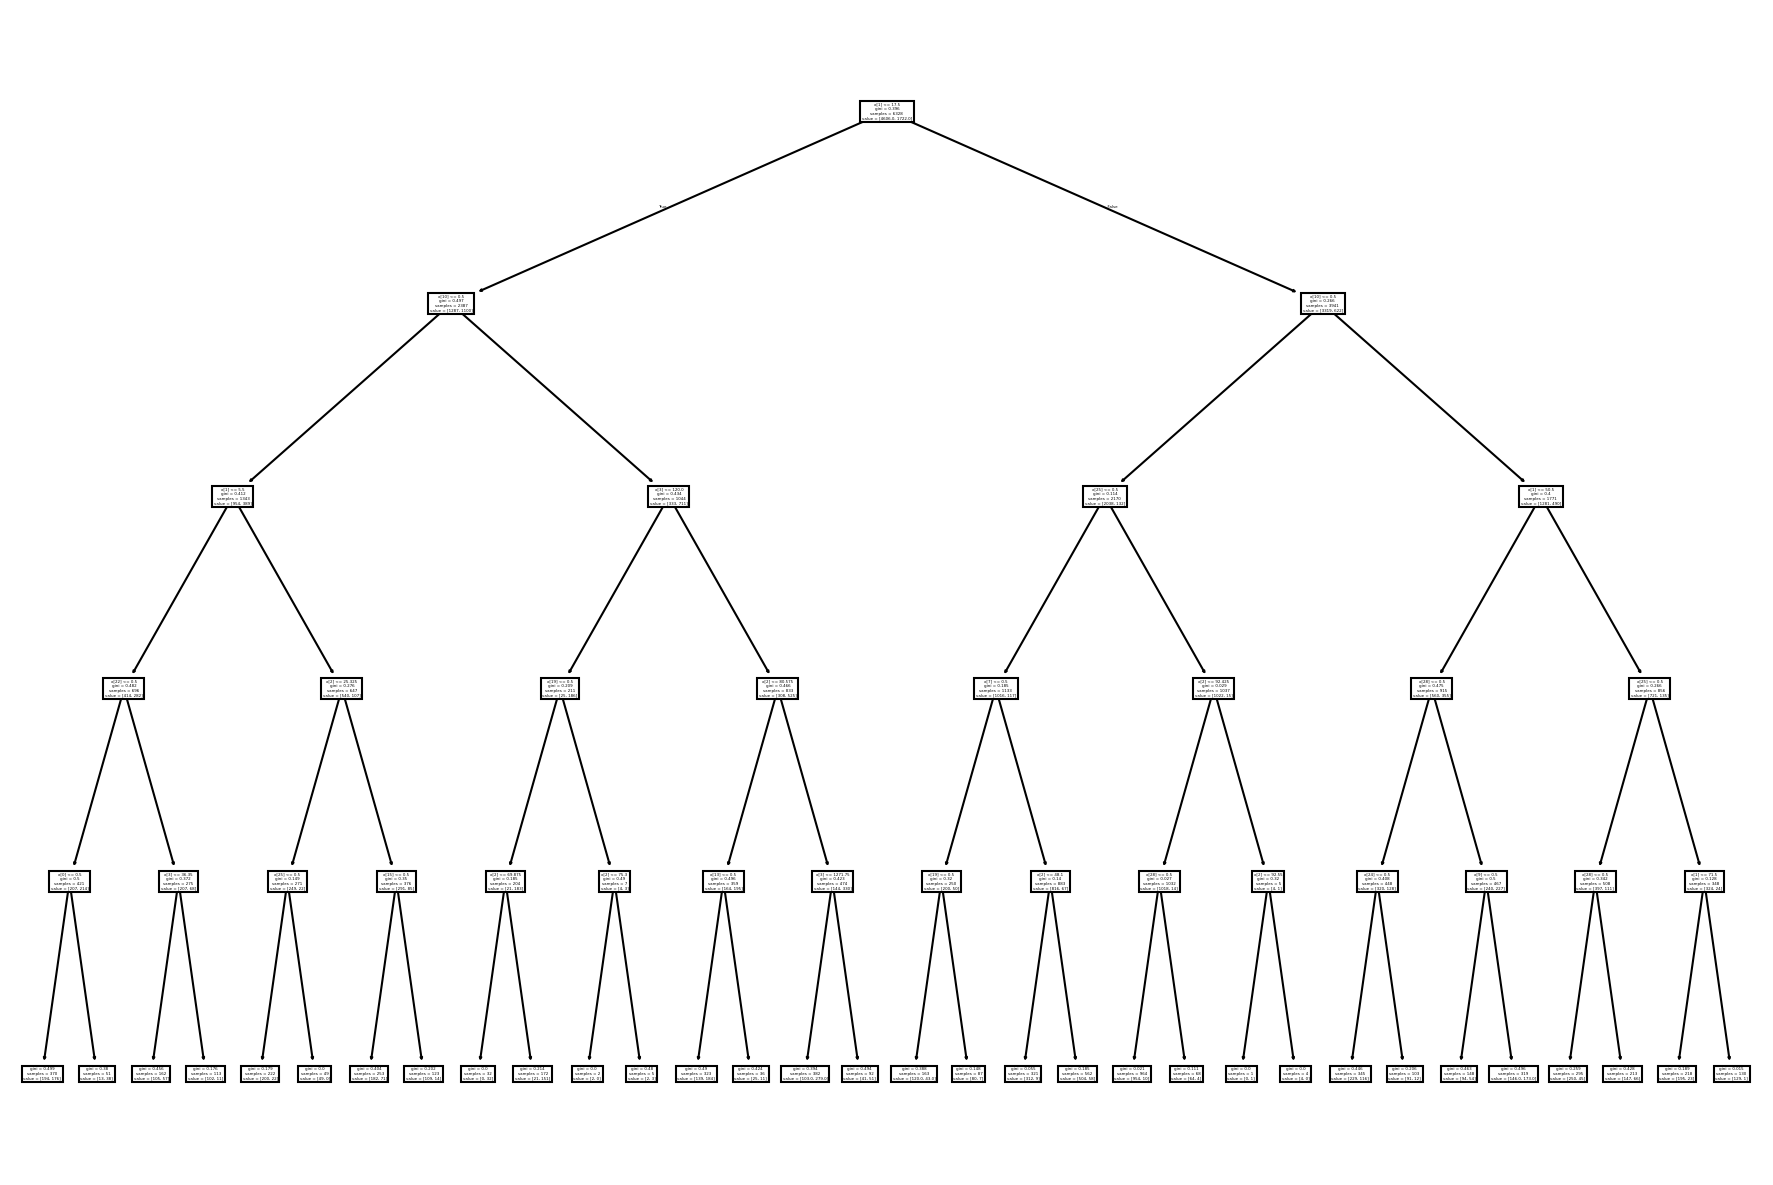

In [64]:
plt.figure(figsize=(15, 10), dpi=150)
plot_tree(dt_grid.best_estimator_);

## Случайный лес (Random Forest)

**Задание: Создайте модель случайного леса, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [65]:
# Напишите Ваш код в этой ячейке
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(oob_score=True)

In [75]:
param_grid = {'n_estimators': range(64, 70), 'max_depth': range(5, 11), 'bootstrap': [True, False]}

In [69]:
rf_grid = GridSearchCV(estimator=rf_model, param_grid=param_grid)

In [70]:
rf_grid.fit(X_train, y_train)

s:\Data\Coding\MachineLearning\venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3250 fits failed out of a total of 6500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3250 fits failed with the following error:
Traceback (most recent call last):
  File "s:\Data\Coding\MachineLearning\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "s:\Data\Coding\MachineLearning\venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "s:\Data\Coding\MachineLearning\venv\Lib\site-packages\sklearn\ensemble\_

GridSearchCV(estimator=RandomForestClassifier(oob_score=True),
             param_grid={'bootstrap': [True, False], 'max_depth': range(1, 11),
                         'n_estimators': range(64, 129)})

In [71]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=67, oob_score=True)

In [77]:
y_pred = rf_grid.predict(X_test)

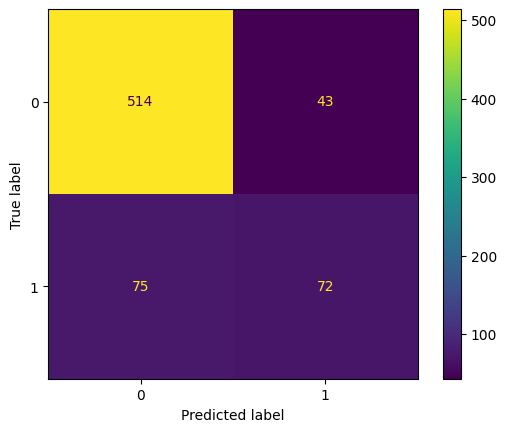

In [79]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       557
         Yes       0.63      0.49      0.55       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



## Расширяемые деревья (Boosted Trees)

**Задание: Создайте модель AdaBoost и Gradient Boosting, затем выведите отчёт "classification report" и матрицу ошибок для предсказанных результатов на тестовом наборе данных.**

In [81]:
# Напишите Ваш код в этой ячейке
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb_model = GradientBoostingClassifier()

In [99]:
param_grid = {'n_estimators': range(50, 64), 'max_depth': range(3, 5)}

In [100]:
gb_grid = GridSearchCV(estimator=gb_model, param_grid=param_grid)

In [101]:
gb_grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(3, 5),
                         'n_estimators': range(50, 64)})

In [102]:
gb_grid.best_params_

{'max_depth': 3, 'n_estimators': 63}

In [103]:
y_pred = gb_grid.predict(X_test)

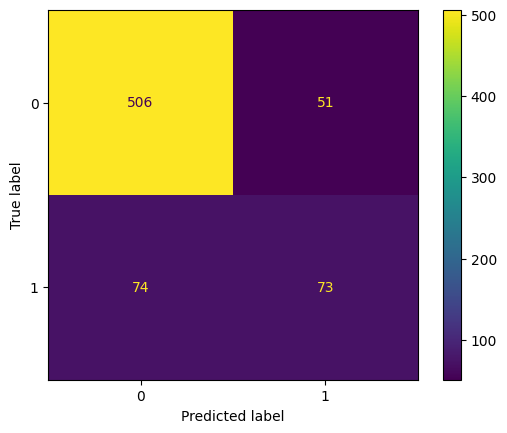

In [104]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.59      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [108]:
ab_model = AdaBoostClassifier()

In [109]:
param_grid = {'n_estimators': range(50, 64)}

In [110]:
ab_grid = GridSearchCV(estimator=ab_model, param_grid=param_grid)

In [111]:
ab_grid.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(50, 64)})

In [112]:
ab_grid.best_params_

{'n_estimators': 52}

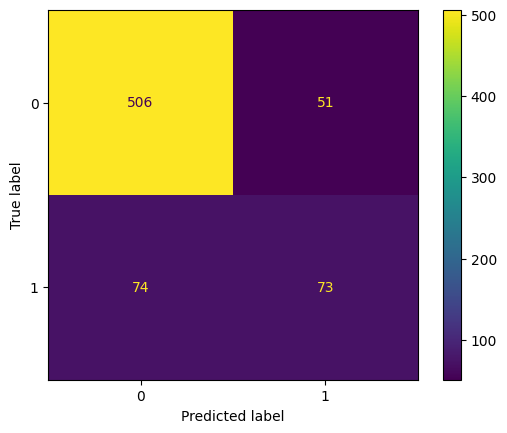

In [113]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.91      0.89       557
         Yes       0.59      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



## Результаты

У нас получились наилучшие результаты в модели RandomForestClassifier, и в целом модели показывали очень похожие результаты на этих данных.

## Отличная работа!

---